### Classifying the dataset using a Convolutional Neural Network (CNN) architecture

In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D
from keras import backend as K
import pickle

Using TensorFlow backend.


In [2]:
with open("trainX.pickle","rb") as f:
    X=pickle.load(f)
    
with open("trainY.pickle","rb") as f:
    Y=pickle.load(f)
    
with open("testX.pickle","rb") as f:
    testX=pickle.load(f)


### Visualize the data

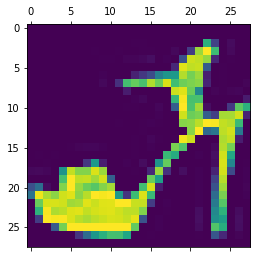

In [3]:
#showing one of the images from the training dataset
plt.matshow(X[9])

In [4]:
Y[0]

9

In [5]:
testX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
X[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

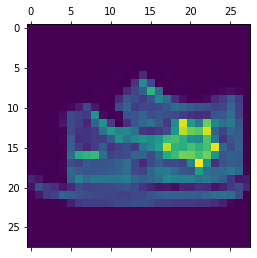

In [7]:
plt.matshow(testX[9999])

In [8]:
print(X.shape)
print(Y.shape)
print(testX.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


## Splitting the data into 4:1:1 ratio

In [9]:
#Splitting the training dataset into training, validation and testing dataset in 8:1:1 split
X_train = X[:40000]
X_val = X[40000:50000]
X_test = X[50000:]

Y_train = Y[:40000]
Y_val = Y[40000:50000]
Y_test = Y[50000:]


print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(40000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


In [10]:
batch_size=128
num_classes=10
epochs=10

In [11]:
X_train=X_train.astype('float32')
X_val=X_val.astype('float32')
X_test=X_test.astype('float32')

# Data normalization
X_train/=255  
X_val/=255
X_test/=255

print('x train shape',X_train.shape)
print(X_train.shape[0],'train samples')
print(X_val.shape[0],'validate samples')
print(X_test.shape[0],'test samples')


Y_train=keras.utils.to_categorical(Y_train,num_classes)
Y_val=keras.utils.to_categorical(Y_val,num_classes)
Y_test=keras.utils.to_categorical(Y_test,num_classes)

x train shape (40000, 28, 28)
40000 train samples
10000 validate samples
10000 test samples


In [12]:
X_train = np.reshape(X_train,(40000,28,28,1))
X_val = np.reshape(X_val,(10000,28,28,1))
X_test = np.reshape(X_test,(10000,28,28,1))

In [13]:
X_train.shape

(40000, 28, 28, 1)

In [14]:
model = Sequential()

#defining input shape in the first layer of the neural network
model.add(Conv2D(kernel_size=3 , filters=64, input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=3, filters=32, activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=4, filters=16, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(225, activation='relu')) 
model.add(Dense(10, activation='relu')) 
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

W0623 23:35:27.460180  7360 deprecation_wrapper.py:119] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 23:35:27.815894  7360 deprecation_wrapper.py:119] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 23:35:27.827895  7360 deprecation_wrapper.py:119] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 23:35:27.899894  7360 deprecation_wrapper.py:119] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecate

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          8208      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)               0         
__________

In [15]:
#train the model
model.fit(X_train,Y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (X_val,Y_val))

W0623 23:36:31.437452  7360 deprecation.py:323] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 23:36:31.565466  7360 deprecation_wrapper.py:119] From c:\users\gunjan\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 103s 3ms/step - loss: 0.8478 - acc: 0.6932 - val_loss: 0.5369 - val_acc: 0.7968
Epoch 2/10
40000/40000 [==============================] - 102s 3ms/step - loss: 0.4611 - acc: 0.8357 - val_loss: 0.4315 - val_acc: 0.8435
Epoch 3/10
40000/40000 [==============================] - 104s 3ms/step - loss: 0.3850 - acc: 0.8620 - val_loss: 0.4490 - val_acc: 0.8385
Epoch 4/10
40000/40000 [==============================] - 96s 2ms/step - loss: 0.3453 - acc: 0.8769 - val_loss: 0.3314 - val_acc: 0.8863
Epoch 5/10
40000/40000 [==============================] - 97s 2ms/step - loss: 0.3184 - acc: 0.8841 - val_loss: 0.3181 - val_acc: 0.8842
Epoch 6/10
40000/40000 [==============================] - 97s 2ms/step - loss: 0.2921 - acc: 0.8946 - val_loss: 0.2972 - val_acc: 0.8964
Epoch 7/10
40000/40000 [==============================] - 95s 2ms/step - loss: 0.2762 - acc: 0.8999 - val_loss: 0.3096 - val_

In [16]:
#test accuracy
score = model.evaluate(X_test,Y_test,verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.3065427252292633
Test accuracy:  0.892


## Splitting the data into 8:1:1 ratio

In [17]:
X_train = X[:48000]
X_val = X[48000:54000]
X_test = X[54000:]

Y_train = Y[:48000]
Y_val = Y[48000:54000]
Y_test = Y[54000:]

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(48000, 28, 28)
(6000, 28, 28)
(6000, 28, 28)


In [18]:
batch_size  = 128
num_classes = 10
epochs = 10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')

X_train /= 255 
X_val /= 255
X_test /= 255

print('X_train shape:', X_train.shape)
print(X_train.shape[0],'train samples')
print(X_val.shape[0],'validation samples')
print(X_test.shape[0],'test samples')

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_val = keras.utils.to_categorical(Y_val,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)

X_train shape: (48000, 28, 28)
48000 train samples
6000 validation samples
6000 test samples


In [19]:
X_train = np.reshape(X_train,(48000,28,28,1))
X_val = np.reshape(X_val,(6000,28,28,1))
X_test = np.reshape(X_test,(6000,28,28,1))

In [20]:
 X_train.shape

(48000, 28, 28, 1)

In [23]:
model = Sequential()

model.add(Conv2D(kernel_size=3 , filters=64, input_shape=(28,28,1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=3, filters=32, activation='relu', padding='same')) 
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(kernel_size=4, filters=16, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(200, activation='relu')) 

model.add(Dense(30, activation='relu')) 

model.add(Dense(10))

model.add(Activation('softmax'))

model.summary()

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

X_train.reshape([-1,28,28,1])
testX = testX.reshape(-1,28, 28, 1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 7, 7, 16)          8208      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 144)               0         
__________

In [24]:
model.fit(X_train,Y_train,
         batch_size = batch_size,
         epochs = epochs,
         verbose = 1,
         validation_data = (X_val,Y_val))

Train on 48000 samples, validate on 6000 samples
Epoch 1/10
48000/48000 [==============================] - 114s 2ms/step - loss: 0.7524 - acc: 0.7176 - val_loss: 0.4156 - val_acc: 0.8507
Epoch 2/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.3920 - acc: 0.8569 - val_loss: 0.3471 - val_acc: 0.8735
Epoch 3/10
48000/48000 [==============================] - 111s 2ms/step - loss: 0.3318 - acc: 0.8768 - val_loss: 0.3434 - val_acc: 0.8742
Epoch 4/10
48000/48000 [==============================] - 112s 2ms/step - loss: 0.2970 - acc: 0.8903 - val_loss: 0.3031 - val_acc: 0.8888
Epoch 5/10
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2747 - acc: 0.8972 - val_loss: 0.2966 - val_acc: 0.8958
Epoch 6/10
48000/48000 [==============================] - 111s 2ms/step - loss: 0.2569 - acc: 0.9030 - val_loss: 0.2750 - val_acc: 0.9032
Epoch 7/10
48000/48000 [==============================] - 113s 2ms/step - loss: 0.2400 - acc: 0.9105 - val_loss: 0.2927 - v

In [27]:
score = model.evaluate(X_test,Y_test,verbose = 0)
print('Test loss: ',score[0])
print('Test accuracy: ',score[1])

Test loss:  0.2612496453523636
Test accuracy:  0.9075


### The accuracy(0.9075) is more when we split the dataset in the ratio 8:1:1

### Visualize the predictions(Predicting values for the test data)

In [28]:
prediction = model.predict_classes([testX])
prediction

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [29]:
prediction[1000]

6

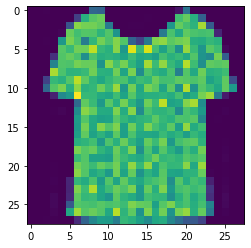

In [31]:
plt.imshow(testX[1000].reshape(28,28))

In [32]:
prediction[50]

4

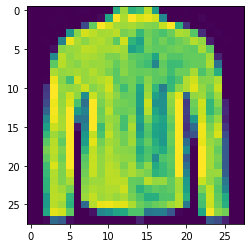

In [33]:
plt.imshow(testX[50].reshape(28,28))

In [34]:
prediction[9999]

5

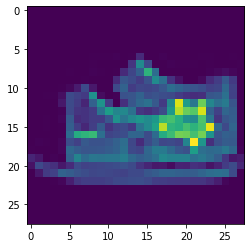

In [35]:
plt.imshow(testX[9999].reshape(28,28))

In [36]:
prediction[6523]

2

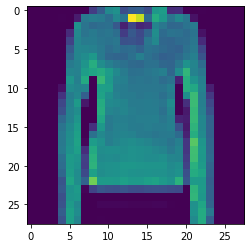

In [37]:
plt.imshow(testX[6523].reshape(28,28))

### Writing the data in predictions.pickle

In [38]:
with open('predictions.pickle', 'wb') as output_file:
    pickle.dump(prediction, output_file)